# Hyperparameters

Кілька прикладів гіперпараметрів, які оптимізують для нейронних мереж:

1. **Кількість шарів (layers)**: Кількість шарів у нейронній мережі визначається глибиною моделі.
2. **Кількість нейронів у кожному шарі (nodes)**: Це кількість нейронів у кожному шарі нейронної мережі.
3. **Швидкість навчання (learning rate)**: Це параметр, який визначає, наскільки швидко модель навчається під час процесу навчання.
4. **Функції активації (activation functions)**: Вони використовуються для передачі сигналів між нейронами у шарах.
5. **Батч-розмір (batch size)**: Кількість прикладів навчання, які використовуються в одному кроці оптимізації.
6. **Кількість епох (epochs)**: Це кількість разів, коли весь набір даних пройшов через нейронну мережу під час навчання.
7. **Регуляризація (regularization)**: Такі як L1 або L2 регуляризація, які допомагають уникнути перенавчання.
8. **Тип оптимізатора (optimizer)**: Алгоритм, який використовується для оновлення ваг моделі під час навчання.

   
Тощо.

In [1]:
import pandas as pd

In [5]:
import os

directory = "../data/credit_card_fraud/"
file_name = "creditcard.csv"

full_path = os.path.join(directory, file_name)

# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download 
# датасет по виявленню шахрайства з кредитною карткою

df = pd.read_csv(full_path)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
len(df[df["Class"] == 1])# / len(df)

492

In [9]:
len(df[df["Class"] == 1]) / len(df)

0.001727485630620034

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
len(df)

284807

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Load the Credit Card Fraud Detection dataset

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [11]:
train_dataset[0]

(tensor([ 1.4116,  0.9934, -0.4560, -0.8941, -0.4673,  1.0892,  3.0244, -1.1949,
          0.9571,  1.2814, -0.1445, -0.1108,  0.5093,  0.0621, -0.0696,  1.4511,
          0.4044, -0.9074,  0.1691, -0.5554, -0.1731,  0.1032,  0.4096,  0.4907,
          1.1420, -0.6708, -0.8072,  0.1919, -0.0991, -0.3225]),
 tensor(0.))

In [12]:
train_loader.__dict__

{'dataset': <torch.utils.data.dataset.TensorDataset at 0x295032f70>,
 'num_workers': 0,
 'prefetch_factor': None,
 'pin_memory': False,
 'pin_memory_device': '',
 'timeout': 0,
 'worker_init_fn': None,
 '_DataLoader__multiprocessing_context': None,
 '_dataset_kind': 0,
 'batch_size': 128,
 'drop_last': False,
 'sampler': <torch.utils.data.sampler.RandomSampler at 0x29784cbe0>,
 'batch_sampler': <torch.utils.data.sampler.BatchSampler at 0x29784cc10>,
 'generator': None,
 'collate_fn': <function torch.utils.data._utils.collate.default_collate(batch)>,
 'persistent_workers': False,
 '_DataLoader__initialized': True,
 '_IterableDataset_len_called': None,
 '_iterator': None}

In [13]:
# use other metric rather than accuracy
predictions = torch.tensor([0]*len(y_test))  # if we naively classify all as 0
accuracy = (predictions == y_test_tensor).float().mean()
accuracy.item()

0.9982795715332031

In [14]:
y_test_tensor.sum()

tensor(98.)

In [18]:
len(y_test_tensor)

56962

In [19]:
from sklearn.metrics import f1_score, precision_score, recall_score

def evaluate(y_test, predictions):
    print("Recall score (pos. 1):", recall_score(y_test.numpy(), predictions.numpy()))
    print("Precision score (pos. 1):", precision_score(y_test.numpy(), predictions.numpy(), zero_division=0))
    print("F1 score (pos. 1):", f1_score(y_test.numpy(), predictions.numpy(), zero_division=0))
    print("F1 score (weighted):", f1_score(y_test.numpy(), predictions.numpy(), average="weighted", zero_division=0))
    print("F1 score (micro):", f1_score(y_test.numpy(), predictions.numpy(), average="micro", zero_division=0))
    print("F1 score (marco):", f1_score(y_test.numpy(), predictions.numpy(), average="macro", zero_division=0))

evaluate(y_test_tensor, predictions)


Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


## Build and optimize

### 1. Number of Layers

In [20]:
# Build the neural network model


class FraudDetectionModel_1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


In [21]:
# losses_experiment_1 = []

In [26]:
def run_experiment(model, loss_recording_list, lr=0.01, train_loader=train_loader, epochs=1, optimizer=optim.SGD):
    # Define loss function and optimizer
    criterion = nn.BCELoss()
    # Stochastic Gradient Descent
    if lr:
        optimizer = optimizer(model.parameters(), lr=lr)  # You may need to experiment with the learning rate
    else:
        optimizer = optimizer(model.parameters())
    
    # Train the model
    loss_res = []
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss_res.append(loss.item())
            loss.backward()
            optimizer.step()
        print("Loss:", loss.item())
    loss_recording_list.append(loss_res)
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()
    
    evaluate(y_test_tensor, predictions)


In [27]:
losses_experiment_1 = []

In [28]:
model_1 = FraudDetectionModel_1()
run_experiment(model_1, losses_experiment_1)

Loss: 0.0072806417010724545
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


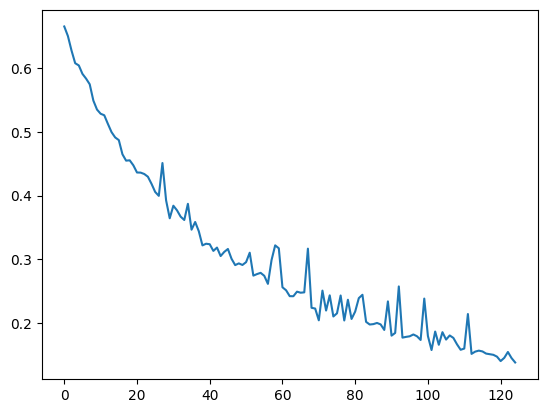

In [31]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_1[0]))
for line in losses_experiment_1:
    plt.plot(x_axis[:125], line[:125])
    # plt.plot(x_axis, line)

In [32]:
# Add one more layer

class FraudDetectionModel_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x


In [33]:
losses_experiment_2 = []

In [34]:
model_2 = FraudDetectionModel_2()

run_experiment(model_2, losses_experiment_2)

Loss: 0.004228358156979084
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


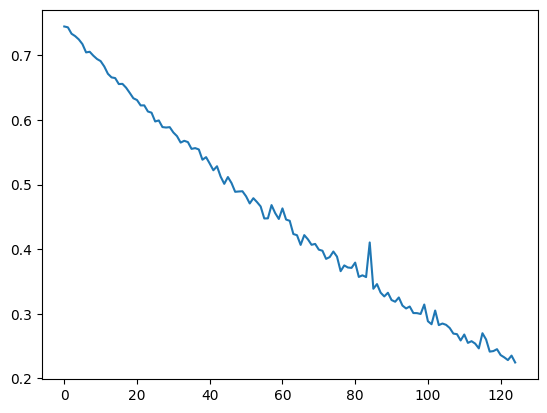

In [35]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_2[0]))
for line in losses_experiment_2:
    plt.plot(x_axis[:125], line[:125])

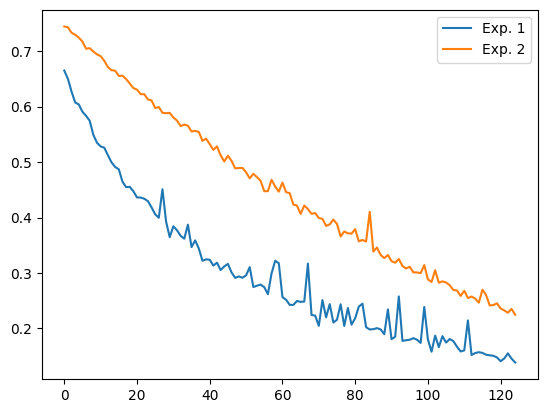

In [36]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.legend()

### 2. Number of Nodes

In [37]:
# Add more nodes

class FraudDetectionModel_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128*2, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [38]:
losses_experiment_3 = []

In [39]:
model_3 = FraudDetectionModel_3()

run_experiment(model_3, losses_experiment_3)

Loss: 0.00642177602276206
Recall score (pos. 1): 0.01020408163265306
Precision score (pos. 1): 1.0
F1 score (pos. 1): 0.020202020202020204
F1 score (weighted): 0.9974635920257426
F1 score (micro): 0.9982971103542713
F1 score (marco): 0.509674917414869


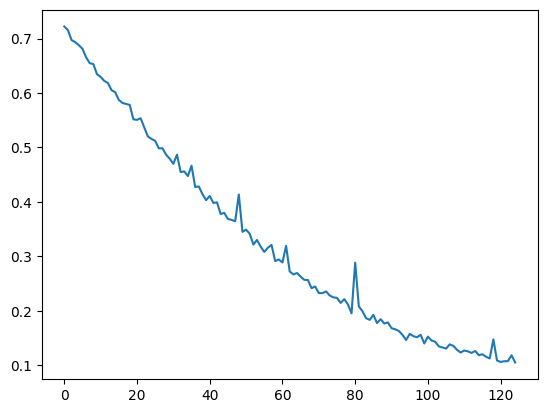

In [40]:
import matplotlib.pyplot as plt

x_axis = range(len(losses_experiment_3[0]))
for line in losses_experiment_3:
    plt.plot(x_axis[:125], line[:125])

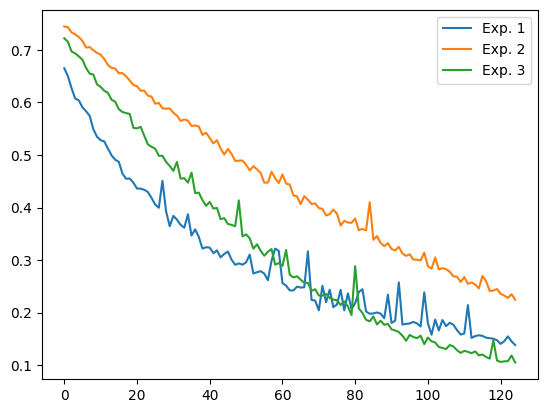

In [41]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)

plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")

plt.legend()

In [42]:
# Return to the simple model and increase number of nodes


class FraudDetectionModel_4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [43]:
losses_experiment_4 = []

In [44]:
model_4 = FraudDetectionModel_4()
run_experiment(model_4, losses_experiment_4)

Loss: 0.008390401490032673
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


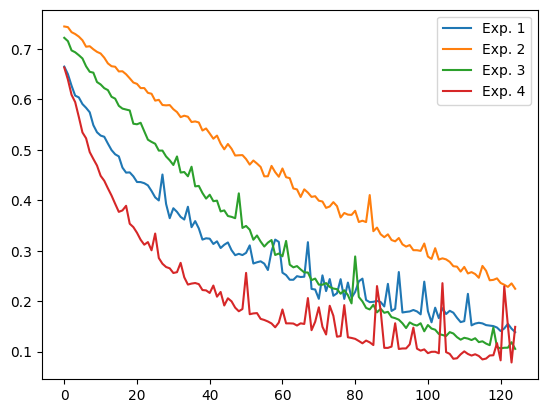

In [45]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")


plt.legend()

### 3. Learning rate

In [46]:
losses_experiment_5 = []

In [47]:
model_5 = FraudDetectionModel_4()

run_experiment(model_5, losses_experiment_5, lr=0.02)


Loss: 0.0033637285232543945
Recall score (pos. 1): 0.37755102040816324
Precision score (pos. 1): 0.7708333333333334
F1 score (pos. 1): 0.5068493150684932
F1 score (weighted): 0.9985198387198186
F1 score (micro): 0.998735999438222
F1 score (marco): 0.7531082519022263


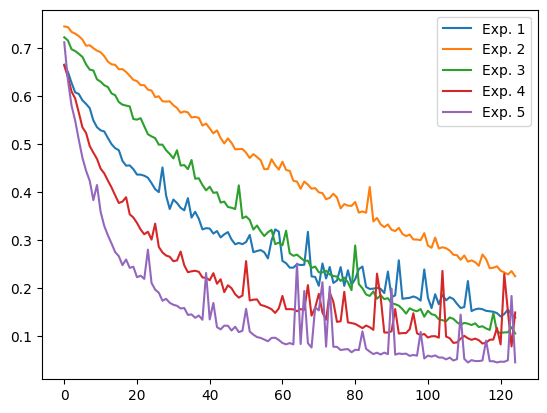

In [48]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")


plt.legend()

### 4. Activation function

https://medium.com/@juanc.olamendy/understanding-relu-leakyrelu-and-prelu-a-comprehensive-guide-20f2775d3d64

In [49]:
# Replace ReLU with PReLU


class FraudDetectionModel_6(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.PReLU()
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [50]:
losses_experiment_6 = []

In [54]:
model_6 = FraudDetectionModel_6()

run_experiment(model_6, losses_experiment_6, lr=0.02)

Loss: 0.008018544875085354
Recall score (pos. 1): 0.32653061224489793
Precision score (pos. 1): 0.7441860465116279
F1 score (pos. 1): 0.45390070921985815
F1 score (weighted): 0.9983849036109903
F1 score (micro): 0.9986482216214319
F1 score (marco): 0.7266119912340294


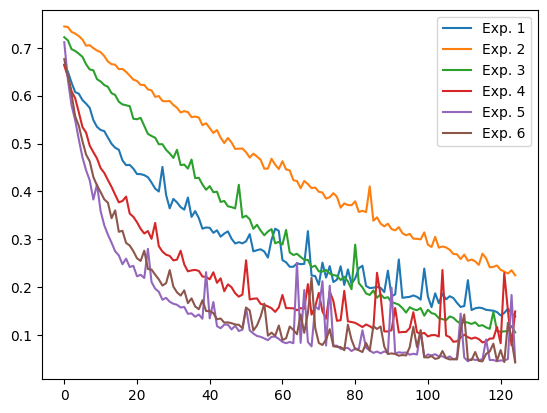

In [55]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")


plt.legend()

### Batch Size

In [56]:
train_loader_new = DataLoader(train_dataset, batch_size=128*2, shuffle=True)

In [57]:
losses_experiment_7 = []

In [58]:
model_7 = FraudDetectionModel_6()

run_experiment(model_7, losses_experiment_7, lr=0.02, train_loader=train_loader_new)

Loss: 0.011537652462720871
Recall score (pos. 1): 0.0
Precision score (pos. 1): 0.0
F1 score (pos. 1): 0.0
F1 score (weighted): 0.9974200728063972
F1 score (micro): 0.9982795547909132
F1 score (marco): 0.4995695183877146


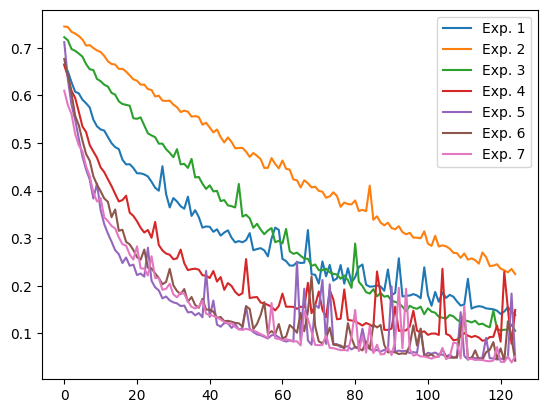

In [59]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")
plt.plot(x_axis[:125], losses_experiment_7_mean[:125], label="Exp. 7")


plt.legend()

### 6. Epochs

In [60]:
losses_experiment_8 = []

In [65]:
model_8 = FraudDetectionModel_6()

run_experiment(model_8, losses_experiment_8, lr=0.02, epochs=3)

Loss: 0.013910399749875069
Loss: 0.0028067263774573803
Loss: 0.0018760766834020615
Recall score (pos. 1): 0.6632653061224489
Precision score (pos. 1): 0.8552631578947368
F1 score (pos. 1): 0.7471264367816092
F1 score (weighted): 0.999178797193737
F1 score (micro): 0.9992275552122467
F1 score (marco): 0.873369811797398


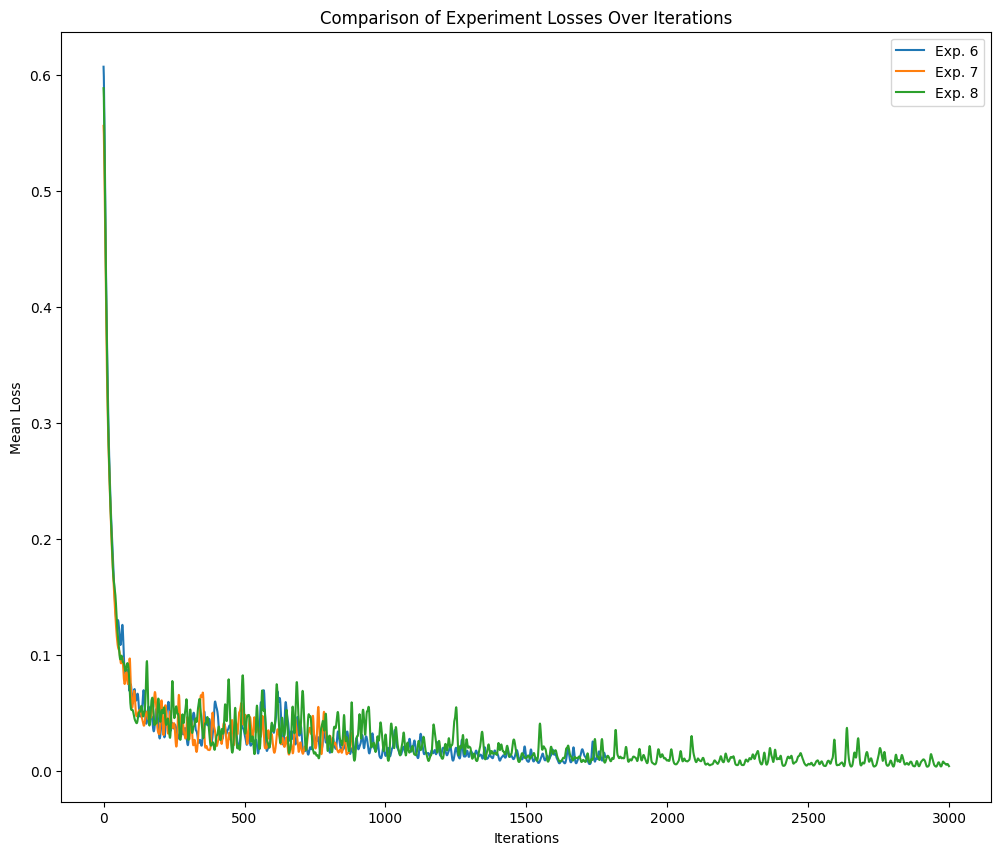

In [66]:
from scipy.ndimage import gaussian_filter1d
import numpy as np
import matplotlib.pyplot as plt

# Your data processing code...
x_axis_short = range(len(losses_experiment_1[0]))
x_axis_shorter = range(len(losses_experiment_7[0]))
x_axis_long = range(len(losses_experiment_8[0]))

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)

plt.figure(figsize=(12, 10))

# Uncomment these if you want to include experiments 1-5
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_1_mean[800:], sigma=3), label="Exp. 1")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_2_mean[800:], sigma=3), label="Exp. 2")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_3_mean[800:], sigma=3), label="Exp. 3")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_4_mean[800:], sigma=3), label="Exp. 4")
#plt.plot(x_axis_short[800:], gaussian_filter1d(losses_experiment_5_mean[800:], sigma=3), label="Exp. 5")
plt.plot(x_axis_short[:], gaussian_filter1d(losses_experiment_6_mean[:], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[:], gaussian_filter1d(losses_experiment_7_mean[:], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[:3000], gaussian_filter1d(losses_experiment_8_mean[:3000], sigma=3), label="Exp. 8")

plt.xlabel('Iterations')
plt.ylabel('Mean Loss')
plt.title('Comparison of Experiment Losses Over Iterations')
plt.legend()
plt.show()


In [67]:
# How do we know where to stop?

def run_experiment_with_early_stopping(model, loss_recording_list, lr=0.01, train_loader=train_loader, val_loader=None, epochs=1, patience=5, optimizer=optim.SGD):
    # Define loss function and optimizer
    criterion = nn.BCELoss()
    
    # Stochastic Gradient Descent
    if lr:
        optimizer = optimizer(model.parameters(), lr=lr)  # You may need to experiment with the learning rate
    else:
        optimizer = optimizer(model.parameters())
    
    # Train the model
    train_loss_res = []
    val_loss_res = []
    
    best_val_loss = float('inf')
    no_improvement_count = 0
    
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            train_loss_res.append(loss.item())
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {loss.item()}")
        
        # Calculate validation loss
        if val_loader:
            model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = model(val_inputs)
                    val_loss += criterion(val_outputs.squeeze(), val_labels).item()
            avg_val_loss = val_loss / len(val_loader)
            val_loss_res.append(avg_val_loss)
            print(f"Epoch {epoch + 1}/{epochs}, Validation Loss: {avg_val_loss}")
            
            # Check for early stopping
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss
                no_improvement_count = 0
            else:
                no_improvement_count += 1
                if no_improvement_count >= patience:
                    print(f"Early stopping after {epoch + 1} epochs with no improvement.")
                    break
    
    loss_recording_list.append({'train_loss': train_loss_res, 'val_loss': val_loss_res})
    
    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()
    
    evaluate(y_test_tensor, predictions)



In [72]:
losses_experiment_8_2 = []

In [73]:
model_8_2 = FraudDetectionModel_6()

# Create PyTorch DataLoader
val_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_dataset, batch_size=128, shuffle=True)

run_experiment_with_early_stopping(model_8_2, losses_experiment_8_2, val_loader=val_loader, lr=0.02, epochs=20, patience=2)

Epoch 1/20, Training Loss: 0.0028138323687016964
Epoch 1/20, Validation Loss: 0.010778055533624752
Epoch 2/20, Training Loss: 0.0026331846602261066
Epoch 2/20, Validation Loss: 0.007824933514585216
Epoch 3/20, Training Loss: 0.0018605573568493128
Epoch 3/20, Validation Loss: 0.006046128393758523
Epoch 4/20, Training Loss: 0.0007611348410136998
Epoch 4/20, Validation Loss: 0.005235282902740519
Epoch 5/20, Training Loss: 0.0014630794757977128
Epoch 5/20, Validation Loss: 0.004956947620530015
Epoch 6/20, Training Loss: 0.0004478196206036955
Epoch 6/20, Validation Loss: 0.0046338890726164384
Epoch 7/20, Training Loss: 0.0008174885297194123
Epoch 7/20, Validation Loss: 0.004213646457284155
Epoch 8/20, Training Loss: 0.0003810433263424784
Epoch 8/20, Validation Loss: 0.004110913247213545
Epoch 9/20, Training Loss: 0.0008703260682523251
Epoch 9/20, Validation Loss: 0.003840174072321855
Epoch 10/20, Training Loss: 0.000913119874894619
Epoch 10/20, Validation Loss: 0.003769391092352753
Epoch 11

In [74]:
losses_experiment_8_2_train = losses_experiment_8_2[len(losses_experiment_8_2)-1]['train_loss']
losses_experiment_8_2_test = losses_experiment_8_2[len(losses_experiment_8_2)-1]['val_loss']

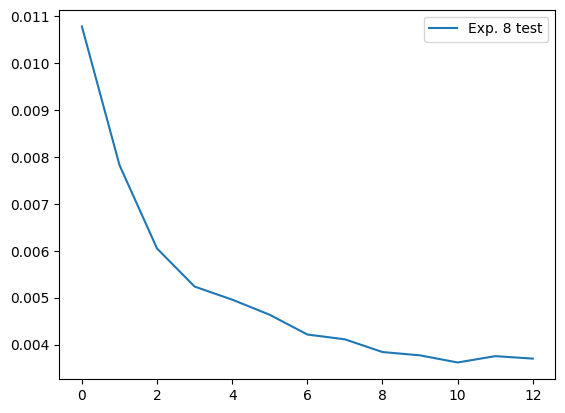

In [75]:

#plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=1), label="Exp. 8")
#plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean_test[start:end], sigma=1), label="Exp. 8 test")

x_axis_train = [i for i in range(len(losses_experiment_8_2_train))]
#plt.plot(x_axis_train, losses_experiment_8_2_train, label="Exp. 8")

factor = len(x_axis_train) // len(losses_experiment_8_2_test)
#x_axis_test = [(i+1)*factor for i in range(len(losses_experiment_8_2_test))]
x_axis_test = [i for i in range(len(losses_experiment_8_2_test))]
plt.plot(x_axis_test, losses_experiment_8_2_test, label="Exp. 8 test")


plt.legend()

### 7. Regularization

In [76]:
# Add dropout


class FraudDetectionModel_7(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128*2)
        self.relu1 = nn.PReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.fc2 = nn.Linear(128*2, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

In [77]:
losses_experiment_9 = []

In [81]:
model_9 = FraudDetectionModel_7()

run_experiment(model_9, losses_experiment_9, lr=0.02, epochs=3)

Loss: 0.0033815528731793165
Loss: 0.0018107177456840873
Loss: 0.002283436479046941
Recall score (pos. 1): 0.673469387755102
Precision score (pos. 1): 0.825
F1 score (pos. 1): 0.7415730337078652
F1 score (weighted): 0.9991516765034901
F1 score (micro): 0.9991924440855307
F1 score (marco): 0.8705843119412324


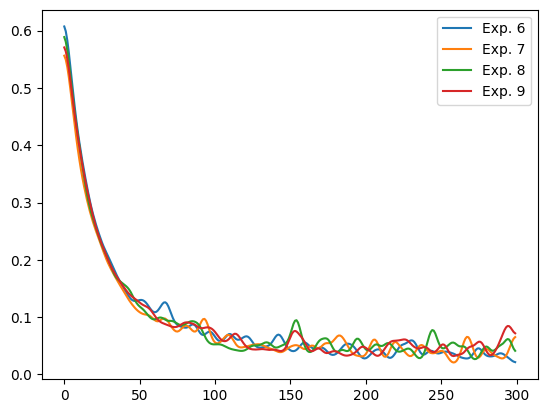

In [82]:
# Compare

# losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
# losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
# losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
# losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
# losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)

start = 0
end = 300
plt.plot(x_axis_short[start:end], gaussian_filter1d(losses_experiment_6_mean[start:end], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[start:end], gaussian_filter1d(losses_experiment_7_mean[start:end], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=3), label="Exp. 8")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_9_mean[start:end], sigma=3), label="Exp. 9")



plt.legend()

### 8. Optimizer

https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

In [83]:
losses_experiment_10 = []

In [87]:
model_10 = FraudDetectionModel_7()
# https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
run_experiment(model_10, losses_experiment_10, lr=None, epochs=3, optimizer=optim.Adam)

Loss: 0.0013801946770399809
Loss: 7.5389884841570165e-06
Loss: 0.00019283065921626985
Recall score (pos. 1): 0.6224489795918368
Precision score (pos. 1): 0.9384615384615385
F1 score (pos. 1): 0.7484662576687118
F1 score (weighted): 0.9992074653265197
F1 score (micro): 0.9992802219023208
F1 score (marco): 0.8740529264802979


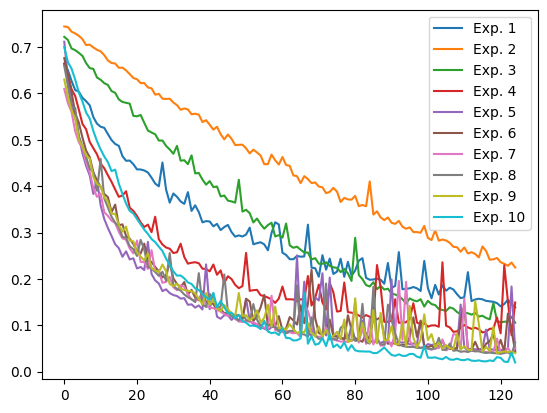

In [88]:
# Compare

# losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
# losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
# losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
# losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
# losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)
losses_experiment_10_mean = np.array(losses_experiment_10).mean(axis=0)


plt.plot(x_axis[:125], losses_experiment_1_mean[:125], label="Exp. 1")
plt.plot(x_axis[:125], losses_experiment_2_mean[:125], label="Exp. 2")
plt.plot(x_axis[:125], losses_experiment_3_mean[:125], label="Exp. 3")
plt.plot(x_axis[:125], losses_experiment_4_mean[:125], label="Exp. 4")
plt.plot(x_axis[:125], losses_experiment_5_mean[:125], label="Exp. 5")
plt.plot(x_axis[:125], losses_experiment_6_mean[:125], label="Exp. 6")
plt.plot(x_axis[:125], losses_experiment_7_mean[:125], label="Exp. 7")
plt.plot(x_axis[:125], losses_experiment_8_mean[:125], label="Exp. 8")
plt.plot(x_axis[:125], losses_experiment_9_mean[:125], label="Exp. 9")
plt.plot(x_axis[:125], losses_experiment_10_mean[:125], label="Exp. 10")


plt.legend()

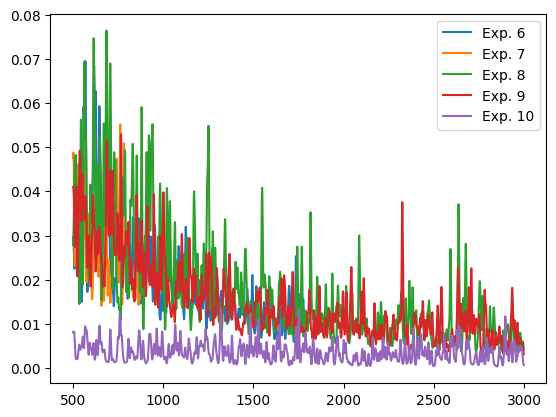

In [89]:
# Compare

losses_experiment_1_mean = np.array(losses_experiment_1).mean(axis=0)
losses_experiment_2_mean = np.array(losses_experiment_2).mean(axis=0)
losses_experiment_3_mean = np.array(losses_experiment_3).mean(axis=0)
losses_experiment_4_mean = np.array(losses_experiment_4).mean(axis=0)
losses_experiment_5_mean = np.array(losses_experiment_5).mean(axis=0)
losses_experiment_6_mean = np.array(losses_experiment_6).mean(axis=0)
losses_experiment_7_mean = np.array(losses_experiment_7).mean(axis=0)
losses_experiment_8_mean = np.array(losses_experiment_8).mean(axis=0)
losses_experiment_9_mean = np.array(losses_experiment_9).mean(axis=0)
losses_experiment_10_mean = np.array(losses_experiment_10).mean(axis=0)

start = 500
end = 3000
plt.plot(x_axis_short[start:], gaussian_filter1d(losses_experiment_6_mean[start:], sigma=3), label="Exp. 6")
plt.plot(x_axis_shorter[start:], gaussian_filter1d(losses_experiment_7_mean[start:], sigma=3), label="Exp. 7")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_8_mean[start:end], sigma=3), label="Exp. 8")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_9_mean[start:end], sigma=3), label="Exp. 9")
plt.plot(x_axis_long[start:end], gaussian_filter1d(losses_experiment_10_mean[start:end], sigma=3), label="Exp. 10")



plt.legend()

## Hyperparameter Optimization

### Grid Search

In [90]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import Pipeline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.base import BaseEstimator, TransformerMixin

# Load the Credit Card Fraud Detection dataset

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the FraudDetectionModel
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size, num_layers, num_nodes):
        super(FraudDetectionModel, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_nodes))
            layers.append(nn.ReLU())
            input_size = num_nodes

        self.model = nn.Sequential(*layers)

        self.output_layer = nn.Linear(num_nodes, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

# Define a custom PyTorch estimator for scikit-learn compatibility
class PyTorchEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, model, criterion=nn.BCELoss(), optimizer_class=optim.Adam, lr=0.001, batch_size=64, epochs=10):
        self.model = model
        self.criterion = criterion
        self.optimizer_class = optimizer_class
        self.lr = lr
        self.batch_size = batch_size
        self.epochs = epochs
        print("Initialized new Estimator")

    def fit(self, X, y):
        train_dataset = TensorDataset(X, y)
        train_loader = DataLoader(train_dataset, batch_size=self.batch_size, shuffle=True)

        optimizer = self.optimizer_class(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            self.model.train()
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = self.model(inputs)
                loss = self.criterion(outputs.squeeze(), labels)
                loss.backward()
                optimizer.step()

        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            outputs = self.model(X)
            predictions = (outputs.squeeze() > 0.5).float()
        return predictions.numpy()

    def get_params(self, deep=True):
        return {'model': self.model, 'criterion': self.criterion,
                'optimizer_class': self.optimizer_class, 'lr': self.lr,
                'batch_size': self.batch_size, 'epochs': self.epochs}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self



# Create a pipeline with the PyTorch model
pipeline = Pipeline([
    ('model', PyTorchEstimator(model=FraudDetectionModel(input_size=X_train.shape[1], num_layers=1, num_nodes=64)))
])

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'model__num_layers': [1, 2, 3],
    'model__num_nodes': [32, 64, 128],
    'model__lr': [0.001, 0.01, 0.1]
}

# Define F1 scorer for GridSearchCV
f1_scorer = make_scorer(f1_score)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=f1_scorer, cv=3, n_jobs=-1)

# Fit the model
grid_search.fit(X_train_tensor, y_train_tensor)

# Print best hyperparameters and corresponding F1 score
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)


Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized new Estimator
Initialized 

## Experiment Tracking with **MLflow**

https://www.mlflow.org/docs/latest/tracking.html#logging-data-to-runs

https://mlflow.org/docs/latest/getting-started/logging-first-model/notebooks/logging-first-model.html

In [92]:
'''
$mlflow server --host 127.0.0.1 --port 8080
'''

'\n$mlflow server --host 127.0.0.1 --port 8080\n'

In [97]:
# Experiment tracking
import mlflow
from mlflow import MlflowClient

client = MlflowClient(tracking_uri="http://127.0.0.1:8080")


In [98]:
all_experiments = client.search_experiments()
all_experiments

[<Experiment: artifact_location='mlflow-artifacts:/0', creation_time=1706386584111, experiment_id='0', last_update_time=1706386584111, lifecycle_stage='active', name='Default', tags={}>]

In [99]:

# Use the fluent API to set the tracking uri and the active experiment
mlflow.set_tracking_uri("http://127.0.0.1:8080")

# Sets the current active experiment to the "Apple_Models" experiment and returns the Experiment metadata
experiment = mlflow.set_experiment("Python_Data_Models")
# Define a run name for this iteration of training.
# If this is not set, a unique name will be auto-generated for your run.
run_name = "HP_opt"

# Define an artifact path that the model will be saved to.


2024/01/27 20:18:02 INFO mlflow.tracking.fluent: Experiment with name 'Python_Data_Models' does not exist. Creating a new experiment.


## Bayesian Optimization

https://towardsdatascience.com/a-conceptual-explanation-of-bayesian-model-based-hyperparameter-optimization-for-machine-learning-b8172278050f

In [100]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import optuna  


# We use here Bayesian optimization
### Optuna uses a history record of trials to determine which hyperparameter values to try next. 
### Using this data, it estimates a promising area and tries values in that area. 
###Optuna then estimates an even more promising region based on the new result. 
###It repeats this process using the history data of trials completed thus far. 
###Specifically, it employs a Bayesian optimization algorithm called Tree-structured Parzen Estimator.
# Alternatives: https://optuna.readthedocs.io/en/stable/tutorial/10_key_features/003_efficient_optimization_algorithms.html


# Display basic information about the dataset
print(df.info())

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create PyTorch DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the FraudDetectionModel with hyperparameters
class FraudDetectionModel(nn.Module):
    def __init__(self, input_size, num_layers, num_nodes, activation, dropout_rate):
        super(FraudDetectionModel, self).__init__()

        layers = []
        for _ in range(num_layers):
            layers.append(nn.Linear(input_size, num_nodes))
            layers.append(get_activation(activation))
            layers.append(nn.Dropout(dropout_rate))
            input_size = num_nodes

        self.model = nn.Sequential(*layers[:-2])  # Exclude the last activation and dropout

        self.output_layer = nn.Linear(num_nodes, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.output_layer(x)
        x = self.sigmoid(x)
        return x

def get_activation(activation):
    if activation == 'relu':
        return nn.ReLU()
    elif activation == 'tanh':
        return nn.Tanh()
    elif activation == 'sigmoid':
        return nn.Sigmoid()
    else:
        raise ValueError(f"Unknown activation function: {activation}")

# Define the objective function for Optuna
def objective(trial):
    print("Starting experiment")
    input_size = X_train.shape[1]
    num_layers = trial.suggest_int('num_layers', 1, 3)
    num_nodes = trial.suggest_int('num_nodes', 32, 256)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])
    dropout_rate = trial.suggest_float('dropout_rate', 0.0, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-1)
    batch_size = trial.suggest_categorical('batch_size', [32, 64, 128])
    epochs = trial.suggest_int('epochs', 5, 30)

    model = FraudDetectionModel(input_size, num_layers, num_nodes, activation, dropout_rate)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        predictions = (outputs.squeeze() > 0.5).float()

    f1 = f1_score(y_test_tensor.numpy(), predictions.numpy())

    # Log metrics with MLflow
    with mlflow.start_run(run_name=run_name) as run:
        mlflow.log_params({
            'num_layers': num_layers,
            'num_nodes': num_nodes,
            'activation': activation,
            'dropout_rate': dropout_rate,
            'learning_rate': learning_rate,
            'batch_size': batch_size,
            'epochs': epochs
        })
        mlflow.log_metric('f1_score', f1)
    print("Ran experiment. 'f1_score'", f1)

    return f1  # Optimize for F1 score

# Run the hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Print the best hyperparameters and corresponding F1 score
print(f"Best F1 Score: {-study.best_value:.4f}")
print("Best Hyperparameters:")
for key, value in study.best_params.items():
    print(f"{key}: {value}")


[I 2024-01-28 07:56:59,807] A new study created in memory with name: no-name-2cebba38-c1df-4baa-9531-c027b0d17027


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

[I 2024-01-28 07:57:07,737] Trial 0 finished with value: 0.814070351758794 and parameters: {'num_layers': 1, 'num_nodes': 74, 'activation': 'relu', 'dropout_rate': 0.3982550347395238, 'learning_rate': 0.0033084946469189866, 'batch_size': 128, 'epochs': 9}. Best is trial 0 with value: 0.814070351758794.


Ran experiment. 'f1_score' 0.814070351758794
Starting experiment


[I 2024-01-28 07:57:41,138] Trial 1 finished with value: 0.7500000000000001 and parameters: {'num_layers': 2, 'num_nodes': 42, 'activation': 'tanh', 'dropout_rate': 0.40637248255237934, 'learning_rate': 0.08991917560999317, 'batch_size': 64, 'epochs': 24}. Best is trial 0 with value: 0.814070351758794.


Ran experiment. 'f1_score' 0.7500000000000001
Starting experiment


[I 2024-01-28 07:57:56,046] Trial 2 finished with value: 0.7794871794871796 and parameters: {'num_layers': 1, 'num_nodes': 190, 'activation': 'sigmoid', 'dropout_rate': 0.41166838568302505, 'learning_rate': 0.0393556823827762, 'batch_size': 128, 'epochs': 17}. Best is trial 0 with value: 0.814070351758794.


Ran experiment. 'f1_score' 0.7794871794871796
Starting experiment


[I 2024-01-28 07:58:08,294] Trial 3 finished with value: 0.7939698492462313 and parameters: {'num_layers': 1, 'num_nodes': 163, 'activation': 'tanh', 'dropout_rate': 0.46663457333021613, 'learning_rate': 0.05379895268594306, 'batch_size': 128, 'epochs': 14}. Best is trial 0 with value: 0.814070351758794.


Ran experiment. 'f1_score' 0.7939698492462313
Starting experiment


[I 2024-01-28 07:58:39,531] Trial 4 finished with value: 0.7881773399014779 and parameters: {'num_layers': 1, 'num_nodes': 247, 'activation': 'relu', 'dropout_rate': 0.3667245872800205, 'learning_rate': 0.005536788210529205, 'batch_size': 64, 'epochs': 25}. Best is trial 0 with value: 0.814070351758794.


Ran experiment. 'f1_score' 0.7881773399014779
Starting experiment


[I 2024-01-28 07:58:56,962] Trial 5 finished with value: 0.5416666666666667 and parameters: {'num_layers': 1, 'num_nodes': 223, 'activation': 'relu', 'dropout_rate': 0.1353095566429503, 'learning_rate': 0.05151453359593366, 'batch_size': 32, 'epochs': 9}. Best is trial 0 with value: 0.814070351758794.


Ran experiment. 'f1_score' 0.5416666666666667
Starting experiment


[I 2024-01-28 07:59:06,406] Trial 6 finished with value: 0.0 and parameters: {'num_layers': 1, 'num_nodes': 149, 'activation': 'tanh', 'dropout_rate': 0.37585883996543046, 'learning_rate': 0.062267403855267474, 'batch_size': 128, 'epochs': 11}. Best is trial 0 with value: 0.814070351758794.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-28 08:00:18,652] Trial 7 finished with value: 0.7246376811594203 and parameters: {'num_layers': 3, 'num_nodes': 171, 'activation': 'tanh', 'dropout_rate': 0.22666717179112894, 'learning_rate': 0.02228664669791543, 'batch_size': 64, 'epochs': 25}. Best is trial 0 with value: 0.814070351758794.


Ran experiment. 'f1_score' 0.7246376811594203
Starting experiment


[I 2024-01-28 08:00:35,213] Trial 8 finished with value: 0.0 and parameters: {'num_layers': 3, 'num_nodes': 247, 'activation': 'relu', 'dropout_rate': 0.48235691460263524, 'learning_rate': 0.03537665082429341, 'batch_size': 128, 'epochs': 7}. Best is trial 0 with value: 0.814070351758794.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-28 08:02:03,297] Trial 9 finished with value: 0.0 and parameters: {'num_layers': 3, 'num_nodes': 53, 'activation': 'relu', 'dropout_rate': 0.437765615306843, 'learning_rate': 0.03177299489811923, 'batch_size': 32, 'epochs': 29}. Best is trial 0 with value: 0.814070351758794.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-28 08:02:09,779] Trial 10 finished with value: 0.8137254901960785 and parameters: {'num_layers': 2, 'num_nodes': 94, 'activation': 'sigmoid', 'dropout_rate': 0.0015438323256893316, 'learning_rate': 0.00395584576366944, 'batch_size': 128, 'epochs': 5}. Best is trial 0 with value: 0.814070351758794.


Ran experiment. 'f1_score' 0.8137254901960785
Starting experiment


[I 2024-01-28 08:02:17,567] Trial 11 finished with value: 0.8350515463917526 and parameters: {'num_layers': 2, 'num_nodes': 97, 'activation': 'sigmoid', 'dropout_rate': 0.016703861424067455, 'learning_rate': 0.001043421896906193, 'batch_size': 128, 'epochs': 6}. Best is trial 11 with value: 0.8350515463917526.


Ran experiment. 'f1_score' 0.8350515463917526
Starting experiment


[I 2024-01-28 08:02:33,144] Trial 12 finished with value: 0.7486033519553073 and parameters: {'num_layers': 2, 'num_nodes': 98, 'activation': 'sigmoid', 'dropout_rate': 0.2761753813886384, 'learning_rate': 0.0153054783782043, 'batch_size': 128, 'epochs': 12}. Best is trial 11 with value: 0.8350515463917526.


Ran experiment. 'f1_score' 0.7486033519553073
Starting experiment


[I 2024-01-28 08:02:39,828] Trial 13 finished with value: 0.8020304568527918 and parameters: {'num_layers': 2, 'num_nodes': 103, 'activation': 'sigmoid', 'dropout_rate': 0.04228531347271802, 'learning_rate': 0.005410759921444739, 'batch_size': 128, 'epochs': 5}. Best is trial 11 with value: 0.8350515463917526.


Ran experiment. 'f1_score' 0.8020304568527918
Starting experiment


[I 2024-01-28 08:02:57,546] Trial 14 finished with value: 0.0 and parameters: {'num_layers': 2, 'num_nodes': 72, 'activation': 'relu', 'dropout_rate': 0.2819085716965115, 'learning_rate': 0.07458883695530408, 'batch_size': 128, 'epochs': 16}. Best is trial 11 with value: 0.8350515463917526.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-28 08:03:14,617] Trial 15 finished with value: 0.7881773399014779 and parameters: {'num_layers': 1, 'num_nodes': 130, 'activation': 'sigmoid', 'dropout_rate': 0.13466775069122605, 'learning_rate': 0.02045810176304553, 'batch_size': 32, 'epochs': 9}. Best is trial 11 with value: 0.8350515463917526.


Ran experiment. 'f1_score' 0.7881773399014779
Starting experiment


[I 2024-01-28 08:03:55,439] Trial 16 finished with value: 0.8241206030150754 and parameters: {'num_layers': 3, 'num_nodes': 125, 'activation': 'sigmoid', 'dropout_rate': 0.19688111999788352, 'learning_rate': 0.0005059610818771271, 'batch_size': 128, 'epochs': 21}. Best is trial 11 with value: 0.8350515463917526.


Ran experiment. 'f1_score' 0.8241206030150754
Starting experiment


[I 2024-01-28 08:04:34,853] Trial 17 finished with value: 0.0 and parameters: {'num_layers': 3, 'num_nodes': 126, 'activation': 'sigmoid', 'dropout_rate': 0.10723961652311706, 'learning_rate': 0.016192033630316495, 'batch_size': 128, 'epochs': 21}. Best is trial 11 with value: 0.8350515463917526.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-28 08:05:25,002] Trial 18 finished with value: 0.0 and parameters: {'num_layers': 3, 'num_nodes': 120, 'activation': 'sigmoid', 'dropout_rate': 0.20182599455158134, 'learning_rate': 0.026488238062148773, 'batch_size': 64, 'epochs': 19}. Best is trial 11 with value: 0.8350515463917526.


Ran experiment. 'f1_score' 0.0
Starting experiment


[I 2024-01-28 08:06:21,019] Trial 19 finished with value: 0.0034349807220469685 and parameters: {'num_layers': 2, 'num_nodes': 73, 'activation': 'sigmoid', 'dropout_rate': 0.07260600170024605, 'learning_rate': 0.09462750385480756, 'batch_size': 32, 'epochs': 21}. Best is trial 11 with value: 0.8350515463917526.


Ran experiment. 'f1_score' 0.0034349807220469685
Best F1 Score: -0.8351
Best Hyperparameters:
num_layers: 2
num_nodes: 97
activation: sigmoid
dropout_rate: 0.016703861424067455
learning_rate: 0.001043421896906193
batch_size: 128
epochs: 6
